In [350]:
%matplotlib inline

import sys
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
import time


In [249]:
# Reads the train.csv file into the df_train dataset, so that we can use Pandas for data exploration

df_train = pd.read_csv('train.csv', index_col='Id')
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [250]:
df_test = pd.read_csv('test.csv', index_col='Id')
df_test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal


In [251]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [252]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
null_values = df_train.isnull().sum()
print(null_values)

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [253]:
print (df_train['Alley'].value_counts())
print (df_train['PoolQC'].value_counts())
print (df_train['MiscFeature'].value_counts())
print (df_train['Fence'].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


In [254]:
del df_train['Alley']
del df_train['PoolQC']
del df_train['MiscFeature']
del df_train['Fence']

In [255]:
del df_test['Alley']
del df_test['PoolQC']
del df_test['MiscFeature']
del df_test['Fence']

In [ ]:
# df_train_lf = df_train[pd.isnull(df_train['LotFrontage']) == False]
# df_train_lfn = df_train[pd.isnull(df_train['LotFrontage'])]

In [256]:
def oencoder(df, column_name, cat_list):
    encoder = OrdinalEncoder(categories=[cat_list], handle_unknown = "use_encoded_value", unknown_value = -1)
    df[column_name] = encoder.fit_transform(df.loc[:,[column_name]])
#     print(df[column_name])
    return

# oencoder(df_train, 'ExterCond', ['Po','Fa','TA','Gd','Ex'])    
    

In [257]:
tobe_enc = {
    'LotShape':['IR3','IR2','IR1','Reg'],
    'LandSlope':['Gtl','Mod','Sev'],
    'ExterQual':['Po','Fa','TA','Gd','Ex'],
    'ExterCond':['Po','Fa','TA','Gd','Ex'],
    'HeatingQC':['Po','Fa','TA','Gd','Ex'],
    'KitchenQual':['Po','Fa','TA','Gd','Ex'],
    'Functional':['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
    'PavedDrive':['N','P','Y']
}

In [258]:
for i in tobe_enc:
    oencoder(df_train, i, tobe_enc[i])
#     print(i, tobe_enc[i])

In [259]:
null_values = df_test.isnull().sum()
print(null_values)


MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath     

In [260]:
df_test['KitchenQual'] = df_test.KitchenQual.fillna('TA')
df_test['Functional'] = df_test.Functional.fillna('Typ')

In [ ]:
# df_test[df_test['Functional']=='Y']
# df_test[df_test['KitchenQual']=='Typ']

In [261]:
for i in tobe_enc:
    oencoder(df_test, i, tobe_enc[i])

In [262]:
# oneenc = OneHotEncoder()

In [156]:
# new_df_train = df_train
# model = oneenc.fit(new_df_train)
# new_train = model.transform(new_df_train)

In [ ]:
# new_test = model.transform(df_test)

In [263]:
new_train = pd.get_dummies(df_train)
new_test = pd.get_dummies(df_test)

In [264]:
print(new_train.shape)
print(new_test.shape)

(1460, 249)
(1459, 232)


In [265]:
for i in {i for i in new_train.columns}-{i for i in new_test.columns}:
    new_test[i]=0

In [266]:
del new_test['SalePrice']

In [200]:
new_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
null_values = new_train.isnull().sum()
print(null_values)

In [220]:
null_values = new_test.isnull().sum()
print(null_values)

MSSubClass               0
LotFrontage              0
LotArea                  0
LotShape                 0
LandSlope                0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
TotRmsAbvGrd             0
Functional               0
Fireplaces               0
GarageCars               0
GarageArea               0
PavedDrive               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3

In [ ]:
new_train['LotFrontage'].describe()
new_train['GarageYrBlt'].describe()
new_train['MasVnrArea'].describe()

In [267]:
del new_train['GarageYrBlt']
del new_test['GarageYrBlt']

In [268]:
new_train['LotFrontage'] = new_train.LotFrontage.fillna(70)
new_test['LotFrontage'] = new_test.LotFrontage.fillna(70)

In [215]:
new_test[new_test['BsmtFinSF1'].isnull()]
new_test['BsmtFinSF1'].describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,RoofMatl_Roll,Exterior1st_ImStucc,Exterior2nd_Other,RoofMatl_Membran,Utilities_NoSeWa,Condition2_RRNn,Exterior1st_Stone,Heating_OthW,Condition2_RRAe,GarageQual_Ex,Condition2_RRAn,HouseStyle_2.5Fin,Electrical_Mix,RoofMatl_Metal,Heating_Floor,RoofMatl_ClyTile
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [287]:
new_train['MasVnrArea']=new_train.MasVnrArea.fillna(0)
new_test['MasVnrArea']=new_test.MasVnrArea.fillna(0)

In [269]:
new_test['BsmtFinSF1'] = new_test.BsmtFinSF1.fillna(0)
new_test['BsmtFinSF2'] = new_test.BsmtFinSF2.fillna(0)
new_test['BsmtUnfSF'] = new_test.BsmtUnfSF.fillna(0)
new_test['TotalBsmtSF'] = new_test.TotalBsmtSF.fillna(0)
new_test['BsmtFullBath'] = new_test.BsmtFullBath.fillna(0)
new_test['BsmtHalfBath'] = new_test.BsmtHalfBath.fillna(0)
new_test['GarageCars'] = new_test.GarageCars.fillna(0)
new_test['GarageArea'] = new_test.GarageArea.fillna(0)

In [337]:
new_train_cluster = new_train.copy()
del new_train_cluster['SalePrice']


In [274]:
new_train_cluster.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [247]:
new_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,cluster
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [276]:
print(new_train_cluster.shape)
print(new_test.shape)

(1460, 247)
(1459, 247)


In [245]:
{i for i in new_train_cluster.columns}-{i for i in new_test.columns}

{'cluster'}

In [285]:
null_values = new_train_cluster.isnull().sum()
print(null_values)

MSSubClass               0
LotFrontage              0
LotArea                  0
LotShape                 0
LandSlope                0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
TotRmsAbvGrd             0
Functional               0
Fireplaces               0
GarageCars               0
GarageArea               0
PavedDrive               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3

In [286]:
null_values = new_test.isnull().sum()
print(null_values)

MSSubClass                0
LotFrontage               0
LotArea                   0
LotShape                  0
LandSlope                 0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
MasVnrArea               15
ExterQual                 0
ExterCond                 0
BsmtFinSF1                0
BsmtFinSF2                0
BsmtUnfSF                 0
TotalBsmtSF               0
HeatingQC                 0
1stFlrSF                  0
2ndFlrSF                  0
LowQualFinSF              0
GrLivArea                 0
BsmtFullBath              0
BsmtHalfBath              0
FullBath                  0
HalfBath                  0
BedroomAbvGr              0
KitchenAbvGr              0
KitchenQual               0
TotRmsAbvGrd              0
Functional                0
Fireplaces                0
GarageCars                0
GarageArea                0
PavedDrive                0
WoodDeckSF                0
OpenPorchSF         

In [338]:
num = 4

In [339]:
km = KMeans(n_clusters = num)
kmtrain = km.fit_predict(new_train_cluster)

In [340]:
new_train_cluster['cluster']=kmtrain

In [ ]:
{i for i in km.feature_names_in_}-{i for i in new_test.columns}

In [341]:
kmtest = km.predict(new_test)

In [342]:
new_test_cluster = new_test.copy()
new_test_cluster['cluster']=kmtest

In [343]:
for i in range(num):
    globals()['cluster_{}'.format(i)]  = new_train_cluster[new_train_cluster['cluster']==i].copy()
    


In [351]:
for i in range(num):
    print(len(globals()['cluster_{}'.format(i)].index))
    globals()['cluster_{}'.format(i)] = shuffle(globals()['cluster_{}'.format(i)])

497
4
940
19


In [352]:
new_train.loc[cluster_1.index]['SalePrice']

Id
336    228950
707    302000
250    277000
314    375000
Name: SalePrice, dtype: int64

In [370]:
cluster_0_train = cluster_0[:373]
cluster_1_train = cluster_1[:3]
cluster_2_train = cluster_2[:705]
cluster_3_train = cluster_3[:14]

cluster_0_tlabel = new_train.loc[cluster_0.index]['SalePrice'].copy()[:373]
cluster_1_tlabel = new_train.loc[cluster_1.index]['SalePrice'].copy()[:3]
cluster_2_tlabel = new_train.loc[cluster_2.index]['SalePrice'].copy()[:705]
cluster_3_tlabel = new_train.loc[cluster_3.index]['SalePrice'].copy()[:14]

cluster_0_dev = cluster_0[373:]
cluster_1_dev = cluster_1[3:]
cluster_2_dev = cluster_2[705:]
cluster_3_dev = cluster_3[14:]

cluster_0_dlabel = new_train.loc[cluster_0.index]['SalePrice'].copy()[373:]
cluster_1_dlabel = new_train.loc[cluster_1.index]['SalePrice'].copy()[3:]
cluster_2_dlabel = new_train.loc[cluster_2.index]['SalePrice'].copy()[705:]
cluster_3_dlabel = new_train.loc[cluster_3.index]['SalePrice'].copy()[14:]


In [371]:
rg = RandomForestRegressor()
# model_0 = rg.fit(cluster_0_train,cluster_0_label)

In [372]:
for i in range(num):
    globals()['model_{}'.format(i)] = rg.fit(globals()['cluster_{}_train'.format(i)],globals()['cluster_{}_tlabel'.format(i)])
    

In [368]:
pred_2 = model_2.predict(cluster_2_dev)

In [378]:
len(pred_2)

235

In [377]:
len(cluster_2_dlabel)

235

In [373]:
error_dev_2 = model_2.score(cluster_2_dev, cluster_2_dlabel)
error_train_2 = model_2.score(cluster_2_train, cluster_2_tlabel)
rmse = (mean_squared_error(cluster_2_dlabel, pred_2))**(1/2)
rmse_log = (mean_squared_log_error(cluster_2_dlabel, pred_2))**(1/2)
print (f'R^2 on train data {error_train_2:.5f}')
print (f'R^2 on dev data {error_dev_2:.5f}')
print (f'RMSE {rmse:.5f}')
print (f'RMSE_LOG {rmse_log:.5f}')

R^2 on train data -2.19383
R^2 on dev data -1.50049
RMSE 94824.82612
RMSE_LOG 0.56083


In [379]:
from sklearn.svm import SVR

In [380]:
sv = SVR()
model_0s = sv.fit(cluster_0_train,cluster_0_tlabel)
pred_0s = model_0s.predict(cluster_0_dev)
error_dev_0s = model_0s.score(cluster_0_dev, cluster_0_dlabel)
error_train_0s = model_0s.score(cluster_0_train, cluster_0_tlabel)

In [381]:
rmse = (mean_squared_error(cluster_0_dlabel, pred_0s))**(1/2)
rmse_log = (mean_squared_log_error(cluster_0_dlabel, pred_0s))**(1/2)
print (f'R^2 on train data {error_train_0s:.5f}')
print (f'R^2 on dev data {error_dev_0s:.5f}')
print (f'RMSE {rmse:.5f}')
print (f'RMSE_LOG {rmse_log:.5f}')

R^2 on train data -0.06113
R^2 on dev data -0.12035
RMSE 88341.43652
RMSE_LOG 0.36914


In [4]:
def encoded(df):

  def miscColumns(dataframe):
     add_categorical = ['Othr', 'TenC', 'Gar2', 'Shed']
     for column in add_categorical:
        data = dataframe['MiscVal'][dataframe['MiscFeature'] == column]
        dataframe[column] = pd.Series(data, index = dataframe.index).fillna(value=0)
     dataframe.drop(columns = ['MiscFeature'], inplace = True)
     dataframe.drop(columns = ['MiscVal'], inplace = True)

  df_encoded = df.copy(deep=True)
  print(df_encoded.shape)
  print("MiscFeature")
  miscColumns(df_encoded)
  print(df_encoded.shape)

  def createAgeFeatures (dataframe):
    dataframe['GarageAge'] = dataframe['GarageYrBlt'].apply(lambda x: 2019 - x)
    dataframe['RemodelAge'] = dataframe['YearRemodAdd'].apply(lambda x: 2019 - x)
    dataframe['HouseAge'] = dataframe['YearBuilt'].apply(lambda x: 2019 - x)

  # Creating "Pool" feature
  def createPoolFeature (dataframe):
    dataframe['Pool'] = dataframe['PoolArea'].apply(lambda x: x != 0).map({True: 1, False: 0})

  # Handling numerical features
  def handleNumericalFeatures (dataframe):
    createAgeFeatures(dataframe)
    createPoolFeature(dataframe)

  handleNumericalFeatures(df_encoded)
  print(df_encoded.shape)

  # Mapping the "Simple mapping" features
  def mapSimpleMapping (dataframe):
    # features = ['ExterCond', 'ExterQual', 'HeatingQC', 'KitchenQual', 'PavedDrive', 'Street']
    dataframe['ExterCond'] = dataframe['ExterCond'].map({
        'Ex' : 2,
        'Gd' : 1,
        'TA' : 0,
        'Fa' : -1,
        'Po' : -2
    })
    dataframe['ExterQual'] = dataframe['ExterQual'].map({
        'Ex' : 2,
        'Gd' : 1,
        'TA' : 0,
        'Fa' : -1,
        'Po' : -2
    })
    dataframe['HeatingQC'] = dataframe['HeatingQC'].map({
        'Ex' : 2,
        'Gd' : 1,
        'TA' : 0,
        'Fa' : -1,
        'Po' : -2
    })
    dataframe['KitchenQual'] = dataframe['KitchenQual'].map({
        'Ex' : 2,
        'Gd' : 1,
        'TA' : 0,
        'Fa' : -1,
        'Po' : -2
    })
    dataframe['PavedDrive'] = dataframe['PavedDrive'].map({
        'Y' : 1,
        'P' : 0.5,
        'N' : 0,
    })
    dataframe['Street'] = dataframe['Street'].map({
        'Grvl' : -1,
        'Pave' : 1,
    })

# Mapping the "Simple mapping w/ NaN" features
  def mapSimpleWithNan (dataframe):
    #features = ['BsmtCond', 'BsmtExposure', 'BsmtQual', 'FireplaceQu',
    #            'GarageCond', 'GarageFinish', 'GarageQual', 'PoolQC']
    dataframe['BsmtCond'] = dataframe['BsmtCond'].map({
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        'Po' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['BsmtExposure'] = dataframe['BsmtExposure'].map({
        'Gd' : 3,
        'Av' : 2,
        'Mn' : 1,
        'No' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['BsmtQual'] = dataframe['BsmtQual'].map({
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        'Po' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['FireplaceQu'] = dataframe['FireplaceQu'].map({
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        'Po' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['GarageCond'] = dataframe['GarageCond'].map({
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        'Po' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['GarageFinish'] = dataframe['GarageFinish'].map({
        'Fin' : 2,
        'RFn' : 1,
        'Unf' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['GarageQual'] = dataframe['GarageQual'].map({
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        'Po' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['PoolQC'] = dataframe['PoolQC'].map({
        'Ex' : 3,
        'Gd' : 2,
        'TA' : 1,
        'Fa' : 0,
        'NA' : -1
    }).fillna(-1)

# Mapping boolean features
  def mapBoolean (dataframe):
    dataframe['CentralAir'] = dataframe['CentralAir'].map({
        'N' : 0,
        'Y' : 1,
    })

# Handling mapped categorical features
  def handleMappedCategorical (dataframe):
    mapSimpleMapping(dataframe)
    mapSimpleWithNan(dataframe)
    mapBoolean(dataframe)

  handleMappedCategorical(df_encoded)
  print(df_encoded.shape)

  
  one_hots = ['BldgType', 'BsmtFinType1', 'BsmtFinType2', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd',
           'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig',
           'MasVnrType', 'MSZoning', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType','Neighborhood']

  def doOneHot (dataframe):
    try:
        for category in one_hots:
#            print("category->"+category)
            df = pd.Categorical(dataframe[category])
            dfDummies = pd.get_dummies(df, prefix = category)
            dfDummies.index = dataframe.index
            dataframe = pd.concat([dataframe, dfDummies], axis=1)
            #print(dataframe.shape)
            if category not in ['Condition1', 'Condition2']:
                dataframe.drop(columns = [category], inplace = True)
            #print(dataframe.shape)
        return dataframe
    except KeyError:
        print ("Oops! Category {} not found! Probably this has already been done...".format(category))
        return dataframe
        

# Processing one-hots
  print("Before"+str(df_encoded.shape))
  print("one hot")
  df_encoded = doOneHot(df_encoded)
  print("After->"+str(df_encoded.shape))

  def handleAlley (dataframe):
    dataframe['Alley'] = dataframe['Alley'].map({'Grvl' : 0, 'Pave' : 1})

  def handleConditions (dataframe):
    handler = {
        'Normal' : 0,  # ??
        'RRNn'   : 1,  # Within 200'
        'RRNe'   : 1,  #
        'PosN'   : 2,  # Near
        'Artery' : 3,  # Adjacent
        'Feedr'  : 3,  #
        'RRAn'   : 3,
        'PosA'   : 3,
        'RRAe'   : 3
    }
    dataframe['Condition1'] = dataframe['Condition1'].map(handler)
    dataframe['Condition2'] = dataframe['Condition2'].map(handler)
    
  def handleElectrical (dataframe):
    handler = {'Mix' : 0, 'FuseP' : 1, 'FuseF' : 2, 'FuseA' : 3, 'SBrkr' : 4}
    dataframe['Electrical'] = dataframe['Electrical'].map(handler)

  def handleFunctional (dataframe):
    handler = {'Typ' : 0, 'Min1' : -1, 'Min2' : -2, 'Mod' : -3, 'Maj1' : -4, 'Maj2' : -5, 'Sev' : -6, 'Sal' : -7}
    dataframe['Functional'] = dataframe['Functional'].map(handler)

  def handleLotShape (dataframe):
    handler = {'Reg' : 0, 'IR1' : -1, 'IR2' : -2, 'IR3' : -3}
    dataframe['LotShape'] = dataframe['LotShape'].map(handler)
    
  def handlePostOneHots (dataframe):
    handleAlley(dataframe)
    handleConditions(dataframe)
    handleElectrical(dataframe)
    handleFunctional(dataframe)
    handleLotShape(dataframe)
    
  handlePostOneHots(df_encoded)
  print(df_encoded.shape)

  def handleFence (dataframe):
    dataframe['FencePrivacy'] = dataframe['Fence'].map({'MnPrv' : 0, 'GdPrv': 1}).fillna(-1)
    dataframe['FenceWood'] = dataframe['Fence'].map({'MnWw' : 0, 'GdWo': 1}).fillna(-1)
    dataframe.drop(columns = ['Fence'], inplace = True)
    return dataframe

  df_encoded = handleFence (df_encoded)
  print(df_encoded.shape)

  def handleUtilities (dataframe):
    dataframe['Electricity'] = dataframe['Utilities'].map({'AllPub' : 1, 'NoSewr' : 1, 'NoSeWa' : 1, 'ELO' : 1}).fillna(0)
    dataframe['Gas'] = dataframe['Utilities'].map({'AllPub' : 1, 'NoSewr' : 1, 'NoSeWa' : 1, 'ELO' : 0}).fillna(0)
    dataframe['Water'] = dataframe['Utilities'].map({'AllPub' : 1, 'NoSewr' : 1, 'NoSeWa' : 0, 'ELO' : 0}).fillna(0)
    dataframe['Septic Tank'] = dataframe['Utilities'].map({'AllPub' : 1, 'NoSewr' : 0, 'NoSeWa' : 0, 'ELO' : 0}).fillna(0)
    dataframe.drop(columns = ['Utilities'], inplace = True)
    return dataframe

  df_encoded = handleUtilities (df_encoded)
  print(df_encoded.shape)
  return df_encoded

encoded(df_train)

(1460, 80)
MiscFeature
(1460, 82)
(1460, 86)
(1460, 86)
Before(1460, 86)
one hot
After->(1460, 233)
(1460, 233)
(1460, 234)
(1460, 237)


,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1,NaN,0,NaN,NaN,7,5,2003,2003,196.0,1,0,3.0,2.0,0.0,706,0,150,856,2,1,4.0,856,854,0,1710,1,0,2,1,3,1,1,8,0,0,-1.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1,1,1,1
2,20,80.0,9600,1,NaN,0,3.0,NaN,6,8,1976,1976,0.0,0,0,3.0,2.0,3.0,978,0,284,1262,2,1,4.0,1262,0,0,1262,0,1,2,0,3,1,0,6,0,1,2.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,-1.0,1,1,1,1
3,60,68.0,11250,1,NaN,-1,NaN,NaN,7,5,2001,2002,162.0,1,0,3.0,2.0,1.0,486,0,434,920,2,1,4.0,920,866,0,1786,1,0,2,1,3,1,1,6,0,1,2.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1,1,1,1
4,70,60.0,9550,1,NaN,-1,NaN,NaN,7,5,1915,1970,0.0,0,0,2.0,3.0,0.0,216,0,540,756,1,1,4.0,961,756,0,1717,1,0,1,0,3,1,1,7,0,1,3.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1,1,1,1
5,60,84.0,14260,1,NaN,-1,NaN,NaN,8,5,2000,2000,350.0,1,0,3.0,2.0,2.0,655,0,490,1145,2,1,4.0,1145,1053,0,2198,1,0,2,1,4,1,1,9,0,1,2.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,1,NaN,0,NaN,NaN,6,5,1999,2000,0.0,0,0,3.0,2.0,0.0,0,0,953,953,2,1,4.0,953,694,0,1647,0,0,2,1,3,1,0,7,0,1,2.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1,1,1,1
1457,20,85.0,13175,1,NaN,0,NaN,NaN,6,6,1978,1988,119.0,0,0,3.0,2.0,0.0,790,163,589,1542,0,1,4.0,2073,0,0,2073,1,0,2,0,3,1,0,7,-1,2,2.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,-1.0,1,1,1,1
1458,70,66.0,9042,1,NaN,0,NaN,NaN,7,9,1941,2006,0.0,2,1,2.0,3.0,0.0,275,0,877,1152,2,1,4.0,1188,1152,0,2340,0,0,2,0,4,1,1,9,0,2,3.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,1,1,1,1


In [5]:
df_train_encoded=encoded(df_train)

(1460, 80)
MiscFeature
(1460, 82)
(1460, 86)
(1460, 86)
Before(1460, 86)
one hot
After->(1460, 233)
(1460, 233)
(1460, 234)
(1460, 237)


In [6]:
def missing_values(dataframe):
  df_imputed = dataframe.copy(deep=True)
  df_imputed['KitchenQual'] = df_imputed['KitchenQual'].fillna(0)
  df_imputed['GarageArea'] = df_imputed['GarageArea'].fillna(0)
  df_imputed['GarageCars'] = df_imputed['GarageCars'].fillna(0)
  df_imputed['GarageCond'] = df_imputed['GarageCond'].fillna(-1)
  df_imputed['GarageFinish'] = df_imputed['GarageFinish'].fillna(-1)
  df_imputed['GarageQual'] = df_imputed['GarageQual'].fillna(-1)
  df_imputed['Electrical'] = df_imputed['Electrical'].fillna(2)
  df_imputed['BsmtFinSF1'] = df_imputed['BsmtFinSF1'].fillna(0)
  df_imputed['BsmtFinSF2'] = df_imputed['BsmtFinSF2'].fillna(0)
  df_imputed['TotalBsmtSF'] = df_imputed['TotalBsmtSF'].fillna(0)
  df_imputed['BsmtUnfSF'] = df_imputed['BsmtUnfSF'].fillna(0)
  df_imputed['BsmtFullBath'] = df_imputed['BsmtFullBath'].fillna(0)
  df_imputed['BsmtHalfBath'] = df_imputed['BsmtHalfBath'].fillna(0)
  df_imputed['MasVnrArea'] = df_imputed['MasVnrArea'].fillna(0)
  df_imputed['Functional'] = df_imputed['Functional'].fillna(0)
  
  null_df = df_imputed[df_imputed['GarageYrBlt'].isnull()]
  null_df['GarageAge'] = null_df['YearBuilt'].apply(lambda x: 2019 - x)
  null_df['GarageYrBlt'] = null_df['YearBuilt']
  df_imputed[df_imputed['GarageYrBlt'].isnull()] = null_df

  
  df_imputed['Condition1'] = df_imputed['Condition1'].fillna(0)
  df_imputed['Condition2'] = df_imputed['Condition2'].fillna(0)
  df_imputed['Alley'] = df_imputed['Alley'].fillna(-1)

  return df_imputed

  #lot frontage do not think it will be important so leaving
df_train_imputed=missing_values(df_train_encoded)
df_missed = df_train_imputed.isnull().sum()
df_missed[df_missed>0].sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


LotFrontage    259
dtype: int64

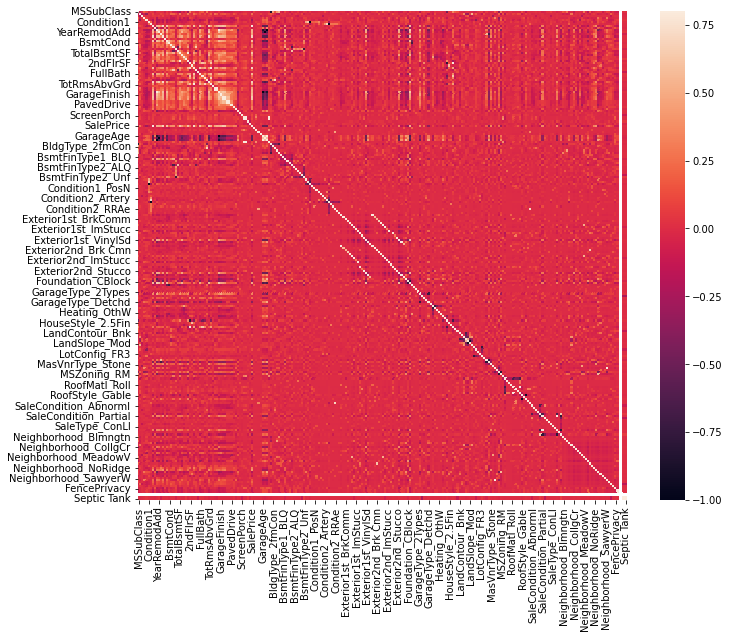

In [7]:
#correlation matrix
corrmat = df_train_imputed.drop(['LotFrontage'],axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

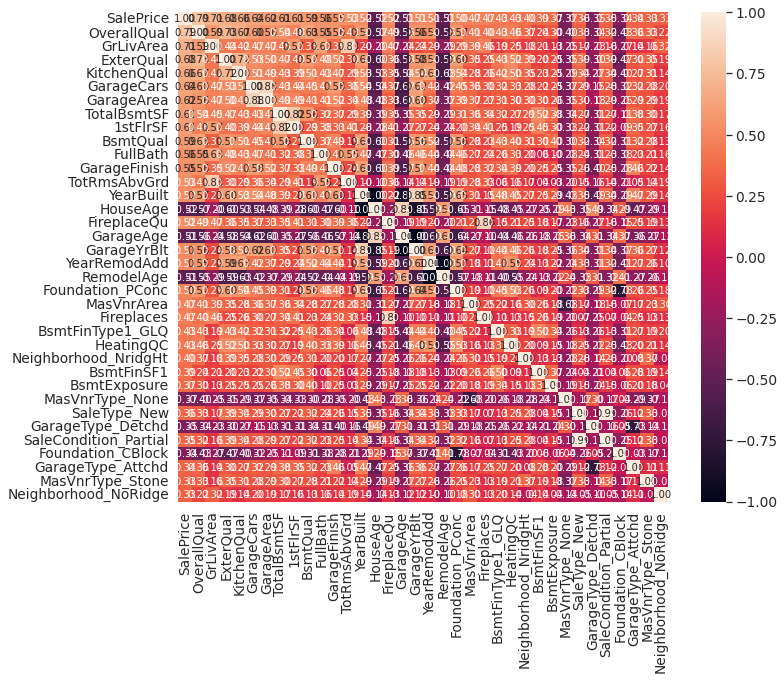

In [8]:
k = 36 #number of variables for heatmap
cols = corrmat.abs().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train_imputed[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
df_relevant_features = df_train_imputed.drop(['LotFrontage','SalePrice'],axis=1)#df_train_imputed[cols.drop('SalePrice')]
df_labels = df_train_imputed['SalePrice']

In [10]:
np.random.seed(0) # Using this to ensure repeatable results - May remove it before production

df_data_array = np.asarray(df_relevant_features)
df_labels_array = np.asarray(df_labels)

dataset_size = df_data_array.shape[0]

shuffle = np.random.permutation(np.arange(dataset_size))
X, Y = df_data_array[shuffle], df_labels_array[shuffle]

split = int(dataset_size*0.8) # 80/20 split between train and dev data

train_data, train_labels = X[:split], Y[:split]
dev_data, dev_labels = X[split:], Y[split:]

In [11]:
lr = LinearRegression(fit_intercept=True)
lr.fit(train_data, train_labels)
predictions = lr.predict(dev_data)
error_dev = lr.score(dev_data, dev_labels)
error_train = lr.score(train_data,train_labels)

rmse = (mean_squared_error(dev_labels, predictions))**(1/2)
rmse_log = (mean_squared_log_error(dev_labels, predictions))**(1/2)
print (f'R^2 on train data {error_train:.5f}')
print (f'R^2 on dev data {error_dev:.5f}')
print (f'RMSE {rmse:.5f}')
print (f'RMSE_LOG {rmse_log:.5f}')

R^2 on train data 0.92666
R^2 on dev data 0.84116
RMSE 27970.37985
RMSE_LOG 0.14515


In [12]:
print(df_test.shape)
df_test_encoded=encoded(df_test)
#df_test_encoded=doOneHot(df_test)
print(df_test_encoded.shape)

(1459, 79)
(1459, 79)
MiscFeature
(1459, 81)
(1459, 85)
(1459, 85)
Before(1459, 85)
one hot
After->(1459, 219)
(1459, 219)
(1459, 220)
(1459, 223)
(1459, 223)


In [13]:
df_test_imputed=missing_values(df_test_encoded)
df_missed = df_test_imputed.isnull().sum()
df_missed[df_missed>0].sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


LotFrontage    227
dtype: int64

In [14]:
df_train['isTrain']=True
df_test['isTrain']=False
full = pd.concat([df_train, df_test], ignore_index = True)
full.drop(['SalePrice'], axis=1, inplace=True)
full_encoded=encoded(full)
full_missing_vals=missing_values(full_encoded)
df_missed = full_missing_vals.isnull().sum()
df_missed[df_missed>0].sort_values(ascending = False)

(2919, 80)
MiscFeature
(2919, 82)
(2919, 86)
(2919, 86)
Before(2919, 86)
one hot
After->(2919, 233)
(2919, 233)
(2919, 234)
(2919, 237)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


LotFrontage    486
dtype: int64

In [15]:
full_missing_vals.loc[full_missing_vals['isTrain'] == True]

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank
0,60,65.0,8450,1,-1.0,0,0.0,0.0,7,5,2003,2003,196.0,1,0,3.0,2.0,0.0,706.0,0.0,150.0,856.0,2,1,4.0,856,854,0,1710,1.0,0.0,2,1,3,1,1.0,8,0.0,0,-1.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0
1,20,80.0,9600,1,-1.0,0,3.0,0.0,6,8,1976,1976,0.0,0,0,3.0,2.0,3.0,978.0,0.0,284.0,1262.0,2,1,4.0,1262,0,0,1262,0.0,1.0,2,0,3,1,0.0,6,0.0,1,2.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,-1.0,1.0,1.0,1.0,1.0
2,60,68.0,11250,1,-1.0,-1,0.0,0.0,7,5,2001,2002,162.0,1,0,3.0,2.0,1.0,486.0,0.0,434.0,920.0,2,1,4.0,920,866,0,1786,1.0,0.0,2,1,3,1,1.0,6,0.0,1,2.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0
3,70,60.0,9550,1,-1.0,-1,0.0,0.0,7,5,1915,1970,0.0,0,0,2.0,3.0,0.0,216.0,0.0,540.0,756.0,1,1,4.0,961,756,0,1717,1.0,0.0,1,0,3,1,1.0,7,0.0,1,3.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0
4,60,84.0,14260,1,-1.0,-1,0.0,0.0,8,5,2000,2000,350.0,1,0,3.0,2.0,2.0,655.0,0.0,490.0,1145.0,2,1,4.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,1.0,9,0.0,1,2.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,1,-1.0,0,0.0,0.0,6,5,1999,2000,0.0,0,0,3.0,2.0,0.0,0.0,0.0,953.0,953.0,2,1,4.0,953,694,0,1647,0.0,0.0,2,1,3,1,0.0,7,0.0,1,2.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0
1456,20,85.0,13175,1,-1.0,0,0.0,0.0,6,6,1978,1988,119.0,0,0,3.0,2.0,0.0,790.0,163.0,589.0,1542.0,0,1,4.0,2073,0,0,2073,1.0,0.0,2,0,3,1,0.0,7,-1.0,2,2.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,-1.0,1.0,1.0,1.0,1.0
1457,70,66.0,9042,1,-1.0,0,0.0,0.0,7,9,1941,2006,0.0,2,1,2.0,3.0,0.0,275.0,0.0,877.0,1152.0,2,1,4.0,1188,1152,0,2340,0.0,0.0,2,0,4,1,1.0,9,0.0,2,3.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,1.0,1.0,1.0
1458,20,68.0,9717,1,-1.0,0,0.0,0.0,5,6,1950,1996,0.0,0,0,2.0,2.0,1.0,49.0,1029.0,0.0,1078.0,1,1,3.0,1078,0,0,1078,1.0,0.0,1,0,2,1,1.0,5,0.0,0,-1.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0


In [65]:
df_train_imputed=full_missing_vals.loc[full_missing_vals['isTrain'] == True]
df_relevant_features = df_train_imputed.drop(['LotFrontage','isTrain'],axis=1)#df_train_imputed[cols.drop('SalePrice')]
df_labels = df_train['SalePrice']
df_relevant_features

,MSSubClass,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank
0,60,8450,1,-1.0,0,0.0,0.0,7,5,2003,2003,196.0,1,0,3.0,2.0,0.0,706.0,0.0,150.0,856.0,2,1,4.0,856,854,0,1710,1.0,0.0,2,1,3,1,1.0,8,0.0,0,-1.0,2003.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0
1,20,9600,1,-1.0,0,3.0,0.0,6,8,1976,1976,0.0,0,0,3.0,2.0,3.0,978.0,0.0,284.0,1262.0,2,1,4.0,1262,0,0,1262,0.0,1.0,2,0,3,1,0.0,6,0.0,1,2.0,1976.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,-1.0,1.0,1.0,1.0,1.0
2,60,11250,1,-1.0,-1,0.0,0.0,7,5,2001,2002,162.0,1,0,3.0,2.0,1.0,486.0,0.0,434.0,920.0,2,1,4.0,920,866,0,1786,1.0,0.0,2,1,3,1,1.0,6,0.0,1,2.0,2001.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0
3,70,9550,1,-1.0,-1,0.0,0.0,7,5,1915,1970,0.0,0,0,2.0,3.0,0.0,216.0,0.0,540.0,756.0,1,1,4.0,961,756,0,1717,1.0,0.0,1,0,3,1,1.0,7,0.0,1,3.0,1998.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0
4,60,14260,1,-1.0,-1,0.0,0.0,8,5,2000,2000,350.0,1,0,3.0,2.0,2.0,655.0,0.0,490.0,1145.0,2,1,4.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,1.0,9,0.0,1,2.0,2000.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,1,-1.0,0,0.0,0.0,6,5,1999,2000,0.0,0,0,3.0,2.0,0.0,0.0,0.0,953.0,953.0,2,1,4.0,953,694,0,1647,0.0,0.0,2,1,3,1,0.0,7,0.0,1,2.0,1999.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0
1456,20,13175,1,-1.0,0,0.0,0.0,6,6,1978,1988,119.0,0,0,3.0,2.0,0.0,790.0,163.0,589.0,1542.0,0,1,4.0,2073,0,0,2073,1.0,0.0,2,0,3,1,0.0,7,-1.0,2,2.0,1978.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,-1.0,1.0,1.0,1.0,1.0
1457,70,9042,1,-1.0,0,0.0,0.0,7,9,1941,2006,0.0,2,1,2.0,3.0,0.0,275.0,0.0,877.0,1152.0,2,1,4.0,1188,1152,0,2340,0.0,0.0,2,0,4,1,1.0,9,0.0,2,3.0,1941.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,1.0,1.0,1.0
1458,20,9717,1,-1.0,0,0.0,0.0,5,6,1950,1996,0.0,0,0,2.0,2.0,1.0,49.0,1029.0,0.0,1078.0,1,1,3.0,1078,0,0,1078,1.0,0.0,1,0,2,1,1.0,5,0.0,0,-1.0,1950.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0


In [66]:
np.random.seed(0) # Using this to ensure repeatable results - May remove it before production

df_data_array = np.asarray(df_relevant_features)
df_labels_array = np.asarray(df_labels)

dataset_size = df_data_array.shape[0]

shuffle = np.random.permutation(np.arange(dataset_size))
X, Y = df_data_array[shuffle], df_labels_array[shuffle]

split = int(dataset_size*0.8) # 80/20 split between train and dev data

train_data, train_labels = X[:split], Y[:split]
dev_data, dev_labels = X[split:], Y[split:]

In [18]:
lr = LinearRegression(fit_intercept=True)
lr.fit(train_data, train_labels)
predictions = lr.predict(dev_data)
error_dev = lr.score(dev_data, dev_labels)
error_train = lr.score(train_data,train_labels)

rmse = (mean_squared_error(dev_labels, predictions))**(1/2)
rmse_log = (mean_squared_log_error(dev_labels, predictions))**(1/2)
print (f'R^2 on train data {error_train:.5f}')
print (f'R^2 on dev data {error_dev:.5f}')
print (f'RMSE {rmse:.5f}')
print (f'RMSE_LOG {rmse_log:.5f}')

R^2 on train data 0.92666
R^2 on dev data 0.84116
RMSE 27970.37985
RMSE_LOG 0.14515


In [19]:
df_test_imputed=full_missing_vals.loc[full_missing_vals['isTrain'] == False]
test_data = df_test_imputed.drop(['LotFrontage'],axis=1)#[cols.drop('SalePrice')]
test_prediction=lr.predict(np.asarray(test_data))
#test_prediction
pd.DataFrame(test_prediction).to_csv("file_name.csv")
# RMSE 0.17

In [20]:
test_prediction

array([113679.62151403, 163981.70386017, 181389.57570304, ...,
       167234.13182179, 116205.50877411, 225849.26951613])

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_data, train_labels)
predictions = rf.predict(dev_data)
error_dev = rf.score(dev_data, dev_labels)
error_train = rf.score(train_data,train_labels)

rmse = (mean_squared_error(dev_labels, predictions))**(1/2)
rmse_log = (mean_squared_log_error(dev_labels, predictions))**(1/2)
print (f'R^2 on train data {error_train:.5f}')
print (f'R^2 on dev data {error_dev:.5f}')
print (f'RMSE {rmse:.5f}')
print (f'RMSE_LOG {rmse_log:.5f}')

R^2 on train data 0.98046
R^2 on dev data 0.88494
RMSE 23805.69497
RMSE_LOG 0.13129


In [74]:
df_test_imputed=full_missing_vals.loc[full_missing_vals['isTrain'] == False]
test_data = df_test_imputed.drop(['LotFrontage','isTrain'],axis=1)#[cols.drop('SalePrice')]
test_prediction=rf.predict(np.asarray(test_data))
#test_prediction
pd.DataFrame(test_prediction).to_csv("file_name.csv")
# RMSE 0.14

In [75]:
test_prediction

array([124187.16, 152939.86, 174784.84, ..., 158861.97, 118730.5 ,
       225575.59])

In [22]:
df_train.groupby(['Neighborhood']).size()

Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
dtype: int64

In [23]:
df_test.groupby(['Neighborhood']).size()

Neighborhood
Blmngtn     11
Blueste      8
BrDale      14
BrkSide     50
ClearCr     16
CollgCr    117
Crawfor     52
Edwards     94
Gilbert     86
IDOTRR      56
MeadowV     20
Mitchel     65
NAmes      218
NPkVill     14
NWAmes      58
NoRidge     30
NridgHt     89
OldTown    126
SWISU       23
Sawyer      77
SawyerW     66
Somerst     96
StoneBr     26
Timber      34
Veenker     13
dtype: int64

In [26]:
train_neigh=df_train['Neighborhood'].to_numpy()
test_neigh=df_test['Neighborhood'].to_numpy()
list(set(test_neigh) - set(train_neigh))

[]

In [27]:
exp_neigh=['NoRidge','NridgHt','StoneBr']
low_neigh=['Mitchel','OldTown','BrkSide','Sawyer','NAmes','IDOTRR','MeadowV','Edwards','NPkVill','BrDale','SWISU','Blueste']
mid_neigh=list(set(train_neigh)-set(exp_neigh)-set(low_neigh))
mid_neigh

['CollgCr',
 'Somerst',
 'Timber',
 'ClearCr',
 'Blmngtn',
 'Veenker',
 'Gilbert',
 'NWAmes',
 'Crawfor',
 'SawyerW']

In [33]:
df_neigh=df_train['Neighborhood']
df_neigh.index=df_relevant_features.index
df_relevant_features=pd.concat([df_relevant_features,df_neigh ], axis=1)
df_relevant_features

,MSSubClass,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank,Neighborhood
0,60,8450,1,-1.0,0,0.0,0.0,7,5,2003,2003,196.0,1,0,3.0,2.0,0.0,706.0,0.0,150.0,856.0,2,1,4.0,856,854,0,1710,1.0,0.0,2,1,3,1,1.0,8,0.0,0,-1.0,2003.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0,CollgCr
1,20,9600,1,-1.0,0,3.0,0.0,6,8,1976,1976,0.0,0,0,3.0,2.0,3.0,978.0,0.0,284.0,1262.0,2,1,4.0,1262,0,0,1262,0.0,1.0,2,0,3,1,0.0,6,0.0,1,2.0,1976.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,-1.0,1.0,1.0,1.0,1.0,Veenker
2,60,11250,1,-1.0,-1,0.0,0.0,7,5,2001,2002,162.0,1,0,3.0,2.0,1.0,486.0,0.0,434.0,920.0,2,1,4.0,920,866,0,1786,1.0,0.0,2,1,3,1,1.0,6,0.0,1,2.0,2001.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0,CollgCr
3,70,9550,1,-1.0,-1,0.0,0.0,7,5,1915,1970,0.0,0,0,2.0,3.0,0.0,216.0,0.0,540.0,756.0,1,1,4.0,961,756,0,1717,1.0,0.0,1,0,3,1,1.0,7,0.0,1,3.0,1998.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0,Crawfor
4,60,14260,1,-1.0,-1,0.0,0.0,8,5,2000,2000,350.0,1,0,3.0,2.0,2.0,655.0,0.0,490.0,1145.0,2,1,4.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,1.0,9,0.0,1,2.0,2000.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0,NoRidge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,1,-1.0,0,0.0,0.0,6,5,1999,2000,0.0,0,0,3.0,2.0,0.0,0.0,0.0,953.0,953.0,2,1,4.0,953,694,0,1647,0.0,0.0,2,1,3,1,0.0,7,0.0,1,2.0,1999.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0,Gilbert
1456,20,13175,1,-1.0,0,0.0,0.0,6,6,1978,1988,119.0,0,0,3.0,2.0,0.0,790.0,163.0,589.0,1542.0,0,1,4.0,2073,0,0,2073,1.0,0.0,2,0,3,1,0.0,7,-1.0,2,2.0,1978.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,-1.0,1.0,1.0,1.0,1.0,NWAmes
1457,70,9042,1,-1.0,0,0.0,0.0,7,9,1941,2006,0.0,2,1,2.0,3.0,0.0,275.0,0.0,877.0,1152.0,2,1,4.0,1188,1152,0,2340,0.0,0.0,2,0,4,1,1.0,9,0.0,2,3.0,1941.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,1.0,1.0,1.0,Crawfor
1458,20,9717,1,-1.0,0,0.0,0.0,5,6,1950,1996,0.0,0,0,2.0,2.0,1.0,49.0,1029.0,0.0,1078.0,1,1,3.0,1078,0,0,1078,1.0,0.0,1,0,2,1,1.0,5,0.0,0,-1.0,1950.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,1.0,1.0,1.0,1.0,NAmes


In [45]:
np.random.seed(0)
df_relevant_features.index=df_labels.index
full_df=pd.concat([df_relevant_features,df_labels],axis=1)

df_low=full_df[full_df['Neighborhood'].isin(low_neigh)]
df_mid=full_df[full_df['Neighborhood'].isin(mid_neigh)]
df_high=full_df[full_df['Neighborhood'].isin(exp_neigh)]

df_data_array_low = np.asarray(df_low.drop(['Neighborhood','SalePrice'],axis=1))
df_labels_array_low = np.asarray(df_low['SalePrice'])
df_data_array_mid = np.asarray(df_mid.drop(['Neighborhood','SalePrice'],axis=1))
df_labels_array_mid = np.asarray(df_mid['SalePrice'])
df_data_array_high = np.asarray(df_high.drop(['Neighborhood','SalePrice'],axis=1))
df_labels_array_high = np.asarray(df_high['SalePrice'])


dataset_size_low = df_data_array_low.shape[0]
dataset_size_mid = df_data_array_mid.shape[0]
dataset_size_high = df_data_array_high.shape[0]

shuffle = np.random.permutation(np.arange(dataset_size_low))
X, Y = df_data_array_low[shuffle], df_labels_array_low[shuffle]
split=int(dataset_size_low*0.8)
train_data_low, train_labels_low = X[:split], Y[:split]
dev_data_low, dev_labels_low = X[split:], Y[split:]

shuffle = np.random.permutation(np.arange(dataset_size_mid))
X, Y = df_data_array_mid[shuffle], df_labels_array_mid[shuffle]
split=int(dataset_size_mid*0.8)
train_data_mid, train_labels_mid = X[:split], Y[:split]
dev_data_mid, dev_labels_mid = X[split:], Y[split:]

shuffle = np.random.permutation(np.arange(dataset_size_high))
X, Y = df_data_array_high[shuffle], df_labels_array_high[shuffle]
split=int(dataset_size_high*0.8)
train_data_high, train_labels_high = X[:split], Y[:split]
dev_data_high, dev_labels_high = X[split:], Y[split:]

In [53]:
lr_low = LinearRegression(fit_intercept=True)
lr_mid = LinearRegression(fit_intercept=True)
lr_high = LinearRegression(fit_intercept=True)

lr_low.fit(train_data_low,train_labels_low)
predictions = lr_low.predict(dev_data_low)
error_dev = lr_low.score(dev_data_low, dev_labels_low)
error_train = lr_low.score(train_data_low,train_labels_low)
rmse = (mean_squared_error(dev_labels_low, predictions))**(1/2)
rmse_log = (mean_squared_log_error(dev_labels_low, predictions))**(1/2)
print (f'R^2 on train data {error_train:.5f}')
print (f'R^2 on dev data {error_dev:.5f}')
print (f'RMSE {rmse:.5f}')
#print (f'RMSE_LOG {rmse_log:.5f}')


R^2 on train data 0.91177
R^2 on dev data 0.53562
RMSE 35997.65075


In [60]:
np.where(predictions < 0)[0]

array([103])

In [61]:
predictions[103]

-14382.418596734991